In [17]:
#%%
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("bootstrap_res_train.csv")

df.describe()
# print(df.mean().values)
# print(df.std(axis=1)).values)
# df.corr()


,0,1,2,3,4,5,6,length
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-0.599193,3.265767,-1.045127,0.858409,-1.343045,-0.927627,-0.690817,176.747500
std,2.114899,1.983400,2.146988,1.904749,1.996707,2.272018,1.936992,170.609142
min,-7.000000,-3.546875,-8.000000,-6.000000,-7.593750,-8.375000,-6.250000,3.000000
25%,-2.003906,1.914062,-2.515625,-0.406250,-2.750000,-2.437500,-2.082031,61.000000
50%,-0.452148,3.406250,-0.912109,0.968750,-1.234375,-0.697266,-0.556641,123.000000
75%,0.954102,4.781250,0.556641,2.296875,0.135010,0.785156,0.828125,232.000000
max,4.687500,8.687500,5.781250,6.156250,3.750000,4.437500,3.890625,1207.000000


In [18]:
df = pd.read_csv("bootstrap_res_test_harmless.csv")
df.describe()

,0,1,2,3,4,5,6,length
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-0.630366,3.259459,-1.055222,0.869933,-1.324628,-0.951978,-0.688470,179.262500
std,2.094532,1.991471,2.132490,1.870471,2.020564,2.284513,1.940824,171.455951
min,-7.062500,-3.156250,-7.875000,-4.625000,-7.781250,-8.125000,-6.437500,0.000000
25%,-2.015625,1.937500,-2.500000,-0.395020,-2.718750,-2.484375,-2.062500,58.000000
50%,-0.459961,3.296875,-0.947266,1.054688,-1.281250,-0.722656,-0.527344,124.000000
75%,0.883789,4.750000,0.500977,2.218750,0.135986,0.769531,0.820312,243.250000
max,6.500000,8.687500,5.062500,5.593750,4.312500,4.406250,3.656250,1282.000000


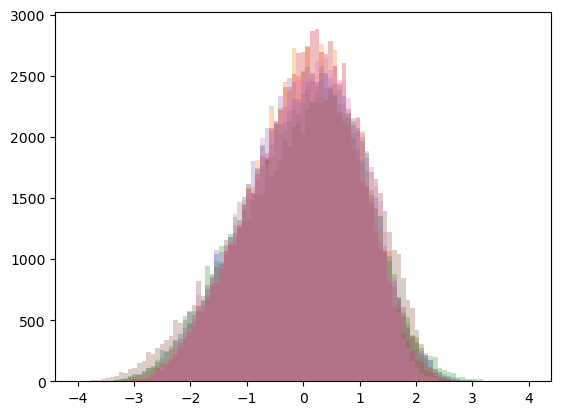

In [16]:
df_norm = df.drop("length", axis="columns")
df_norm = (df_norm - df_norm.mean()) / df_norm.std()
df_norm.describe()

bins = np.linspace(-4, 4, 100)

for i in range(7):
    plt.hist(df_norm[f"{i}"], bins, alpha=0.3)
plt.show()

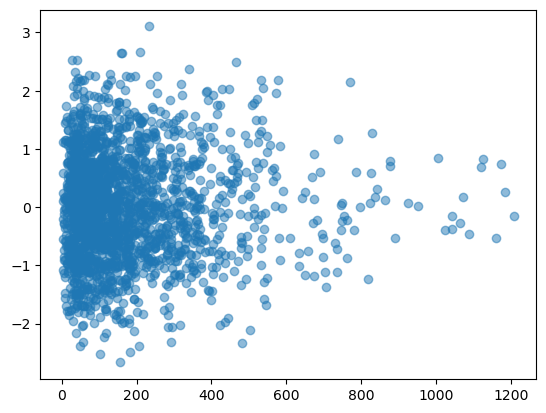

In [27]:
plt.scatter(df["length"], df_norm.mean(axis=1), alpha=0.5)

In [36]:
df_train = pd.read_csv("bootstrap_res_train.csv")
lengths_train = df_train["length"]
df_train = df_train.drop("length", axis="columns")
# print(df.describe())
df_train_norm = (df_train - df_train.mean()) / df_train.std()
std_train = df_train_norm.std(axis=1).to_numpy()
print(std_train)

df_test = pd.read_csv("bootstrap_res_test.csv")
lengths_test = df_test["length"]
df_test = df_test.drop("length", axis="columns")
# print(df.describe())
df_test_norm = (df_test - df_train.mean()) / df_train.std()
std_test = df_test_norm.std(axis=1).to_numpy()
print(std_test)

df_test_norm.describe()

[0.26249306 0.12916921 0.16591289 ... 0.35517291 0.35882475 0.31015221]
[0.32919898 0.3416351  0.38178188 ... 0.30260581 0.07729857 0.14204968]


,0,1,2,3,4,5,6
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-0.205457,-0.355748,-0.099493,-0.114740,-0.117556,-0.158238,-0.115126
std,0.848338,0.899251,0.826758,0.843378,0.840465,0.796817,0.799191
min,-2.937874,-3.072447,-2.409712,-2.763965,-2.301017,-2.411346,-2.547343
25%,-0.789796,-0.976930,-0.684912,-0.675486,-0.712463,-0.760831,-0.700085
50%,-0.222762,-0.370332,-0.139089,-0.138947,-0.180337,-0.186590,-0.136429
75%,0.381327,0.236265,0.451821,0.419895,0.433711,0.416652,0.444999
max,2.736156,2.292393,2.917518,4.143114,2.910691,2.457673,2.486234


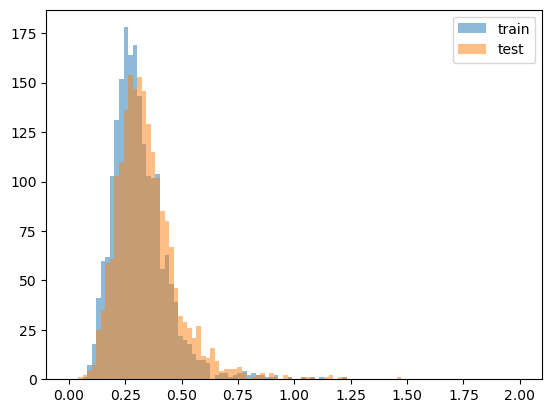

0.3125028538842519
0.34517939160878264


In [37]:

bins = np.linspace(0, 2, 100)

plt.hist(std_train, bins, alpha=0.5, label="train")
plt.hist(std_test, bins, alpha=0.5, label="test")
plt.legend(loc='upper right')
plt.show()
print(std_train.mean())
print(std_test.mean())

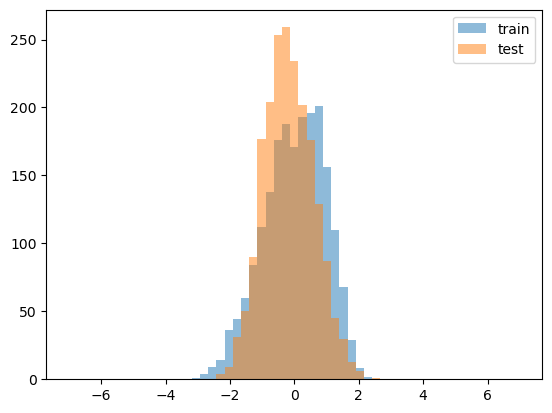

In [38]:
bins = np.linspace(-7, 7, 56) 
plt.hist(df_train_norm.mean(axis=1), bins, alpha=0.5, label="train")
plt.hist(df_test_norm.mean(axis=1), bins, alpha=0.5, label="test")
plt.legend(loc='upper right')
plt.show()

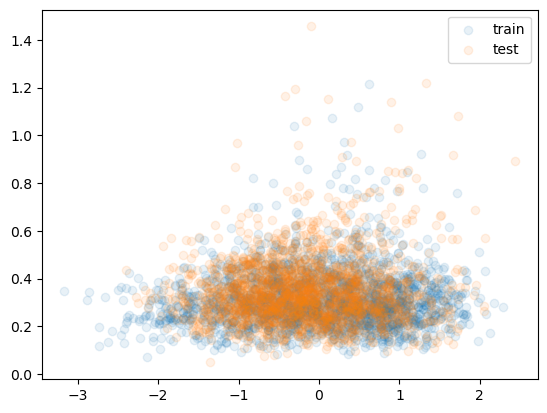

In [22]:
plt.scatter(df_train_norm.mean(axis=1), std_train, alpha=0.1, label="train")
plt.scatter(df_test_norm.mean(axis=1), std_test, alpha=0.1, label="test")
plt.legend(loc='upper right')
plt.show()

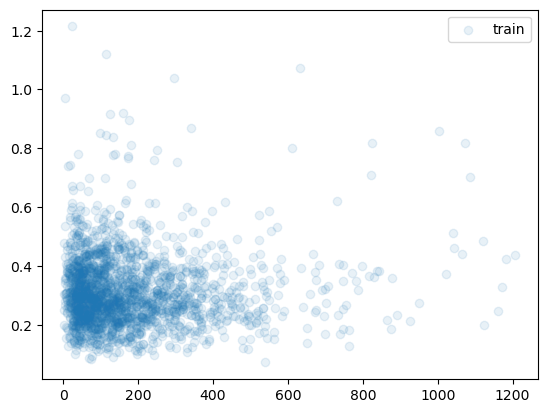

In [40]:
plt.scatter(lengths_train, std_train, alpha=0.1, label="train")
plt.scatter(lengths_test, std_test, alpha=0.1, label="test")
plt.legend(loc='upper right')
plt.show()